<a href="https://colab.research.google.com/github/Michwynn/Capstone-Team-Air-/blob/main/Geographical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import folium
import seaborn as sns
from matplotlib import pyplot as plt
import branca.colormap as cm
RANDOM_SEED = 44

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Capstone

pd.set_option('display.max_columns', None)

Mounted at /content/drive
/content/drive/My Drive/Capstone


**read dataset**

In [ ]:
df = pd.read_csv('assets/cleaned_assets/df_cleaned.csv', index_col = 0)
df['log_price'] = np.log(df['price'])

**catplot for price distribution**

<Figure size 800x1200 with 0 Axes>

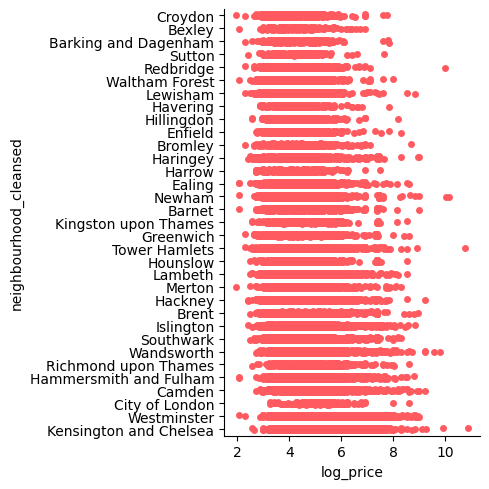

In [ ]:
df_mean_price = df.groupby('neighbourhood_cleansed')['log_price'].mean().reset_index().sort_values('log_price', ascending=False)
plt.figure(figsize=(8,12))
# get the sort by median
index_sort = df.groupby('neighbourhood_cleansed')['log_price'].median().sort_values().index
sns.catplot(x="log_price", y="neighbourhood_cleansed", color = '#FF5A5F', order = index_sort.tolist(), data=df)

**boxplot for price distribution**

<Axes: xlabel='log_price', ylabel='neighbourhood_cleansed'>

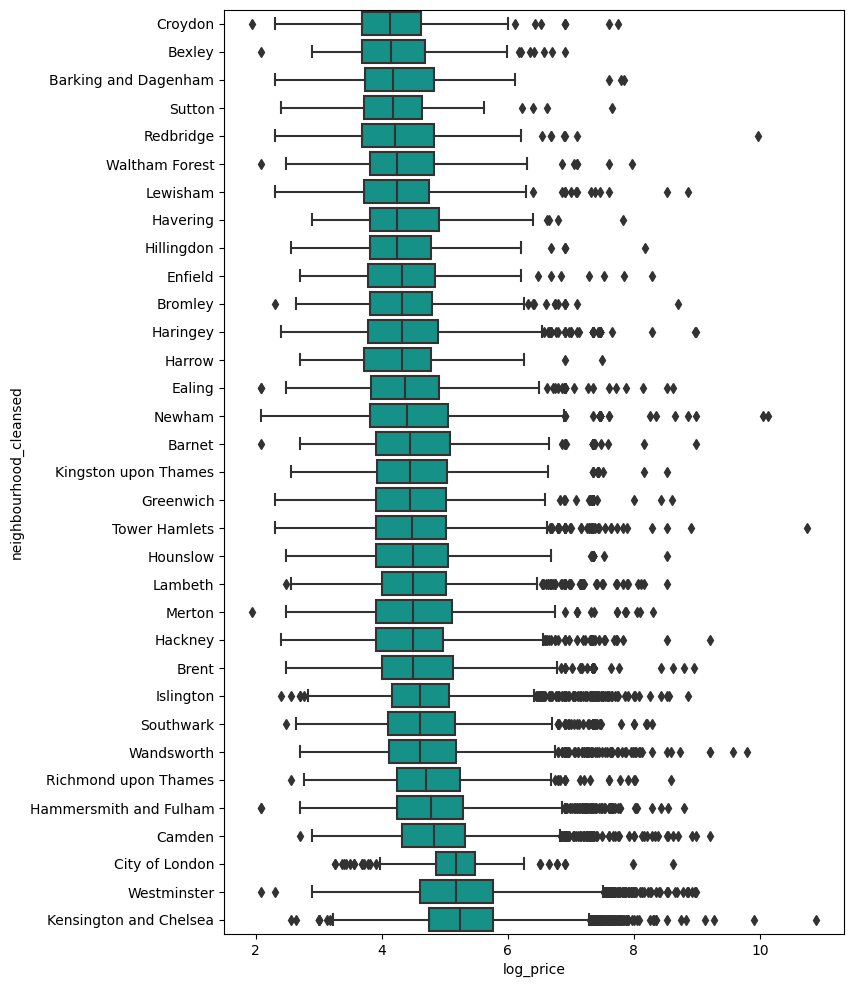

In [ ]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='log_price', y='neighbourhood_cleansed', order = index_sort.tolist(), color= '#00A699')

**plotting folium map**

In [ ]:
# set colour for folium points
linear = cm.LinearColormap(["#FC642D", "#FF5A5F", "#00A699", '#484848'], vmin=np.round(df['log_price'].min(),0), vmax=np.round(df['log_price'].max(),0))
display(linear)

In [ ]:
map = folium.Map([51.5123,0.0910], zoom_start= 2)

for _, row in df.iterrows():
    folium.CircleMarker([row.latitude, row.longitude],
                      popup = row.neighbourhood_cleansed,
                      radius = 3,
                      color = linear(row.log_price),
                      fill = True,
                      fill_opacity = 0.7
                      ).add_to(map)

map.save("london_map.html")